In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sfa
import warnings 
warnings.filterwarnings("ignore")

In [8]:
tips = sns.load_dataset("tips")
tips.head()
# Predictor: Total_Bill, tgt: tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
model = sfa.ols("tip~total_bill", data=tips).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           6.69e-34
Time:                        13:57:26   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
tips["pred_tip"]=0.9203+0.1050*tips["total_bill"]

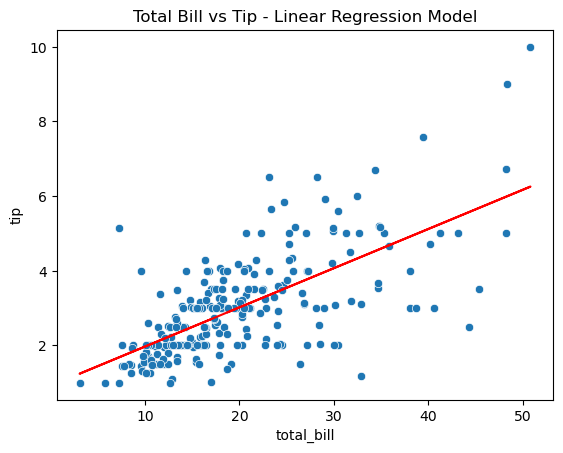

In [14]:
sns.scatterplot(x="total_bill",y="tip",data=tips)
plt.plot(tips.total_bill,tips.pred_tip,color="r")
plt.title("Total Bill vs Tip - Linear Regression Model")
plt.show()

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,pred_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,2.70425
1,10.34,1.66,Male,No,Sun,Dinner,3,2.00600
2,21.01,3.50,Male,No,Sun,Dinner,3,3.12635
3,23.68,3.31,Male,No,Sun,Dinner,2,3.40670
4,24.59,3.61,Female,No,Sun,Dinner,4,3.50225


In [18]:
tips["error"]=tips["tip"] - tips["pred_tip"]